In [1]:
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder

# Общие функции кластеризации
from scipy.cluster.hierarchy import *
from scipy.spatial.distance import pdist

from pylab import *
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Customers.csv",sep=";",index_col="CLIENT_UK")

In [3]:
data.replace({"F":0,"M":1},inplace=True)
data.replace({"Y":1,"N":0},inplace=True)

data["ADRESS"]=map(lambda x: x.decode("cp1251"), list(data['ADRESS']))
data["SRVPACKAGE_GRP"]=map(lambda x: x.decode("cp1251"), list(data['SRVPACKAGE_GRP']))

data.dropna(inplace=True)

data["CLIENT_ACTIVE_DATE"]=data["CLIENT_ACTIVE_DATE"].astype(str)
data["CLIENT_ACTIVE_DATE"]=map(lambda x: datetime.datetime.strptime(x, "%d.%m.%Y").year, list(data["CLIENT_ACTIVE_DATE"]))
data["START_DATE"]=map(lambda x: datetime.datetime.strptime(x, "%d.%m.%Y").year, list(data["START_DATE"]))


In [4]:
df=data[["GENDER_CCODE","BIRTH_DATE","START_DATE","CLIENT_ACTIVE_FLAG","CLIENT_ACTIVE_DATE","ADRESS","SALARYSTATUS_FLAG","PRIMARYBANK_FLAG","MOBILE_PHONE_FLAG","EMAIL_FLAG"]]

In [5]:
df["BIRTH_DATE"]=2017-df["BIRTH_DATE"]
df["START_DATE"]=2017-df["START_DATE"]
df["CLIENT_ACTIVE_DATE"]=2017-df["CLIENT_ACTIVE_DATE"]

In [6]:
le=LabelEncoder()
df["ADRESS"]=le.fit_transform(df["ADRESS"])

In [7]:
df["BIRTH_DATE"]=normalize(df["BIRTH_DATE"])[0]
df["START_DATE"]=normalize(df["START_DATE"])[0]
df["CLIENT_ACTIVE_DATE"]=normalize(df["CLIENT_ACTIVE_DATE"])[0]
df["ADRESS"]=normalize(df["ADRESS"])[0]

### Поиск оптимального кол-ва кластеров

In [8]:
# Настройка шрифтов для будущих графиков
rcParams['font.family'] = 'DejaVu Sans' # Понимает русские буквы
rcParams['font.size'] = 16

In [9]:
df2=df.as_matrix()

In [10]:
# Вычисляем расстояние
data_dist = pdist(df2, 'euclidean')
# Для кластерризации
data_linkage = linkage(data_dist, method='average')

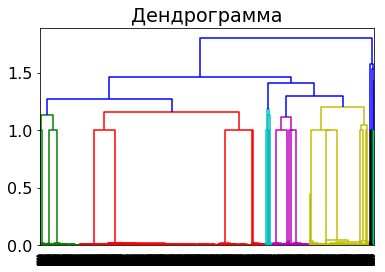

In [11]:
figure()
dendrogram(data_linkage)
title(u'Дендрограмма')
show()
#savefig('myimage.png', format='png', dpi=1200)

### Кластеризация

In [12]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df2)
arr=kmeans.labels_

In [13]:
clust=pd.DataFrame(arr,index=None)

In [17]:
tmp=[]
for i in range(0,len(df.index)):
               tmp.append([df.index[i],clust[0][i]])
        
ans=pd.DataFrame(tmp,columns=(["ID","CLUST"]))
ans=ans.set_index("ID")

In [18]:
ans.to_csv("ans.csv")

In [19]:
ans.to_excel("ans.xlsx")